In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


path = '/Users/jonzimmerman/Desktop/Data Projects/Amtrak/data/'
amtrak_df = pd.read_csv(path + 'amtrak_df.csv')
amtrak_df.shape

(32676, 9)

In [154]:
amtrak_df.head()

,Year,Month,Rides,address,state,station_name,abbrev,lat,lon
0,2016,1,1486.44,"18 E Bel Air Ave Aberdeen, MD 21001-3701",MD,"Aberdeen, MD",ABE,39.509437,-76.163827
1,2016,2,2229.66,"18 E Bel Air Ave Aberdeen, MD 21001-3701",MD,"Aberdeen, MD",ABE,39.509437,-76.163827
2,2016,3,2601.27,"18 E Bel Air Ave Aberdeen, MD 21001-3701",MD,"Aberdeen, MD",ABE,39.509437,-76.163827
3,2016,4,3344.49,"18 E Bel Air Ave Aberdeen, MD 21001-3701",MD,"Aberdeen, MD",ABE,39.509437,-76.163827
4,2016,5,4087.71,"18 E Bel Air Ave Aberdeen, MD 21001-3701",MD,"Aberdeen, MD",ABE,39.509437,-76.163827


### Top 10 stations per year

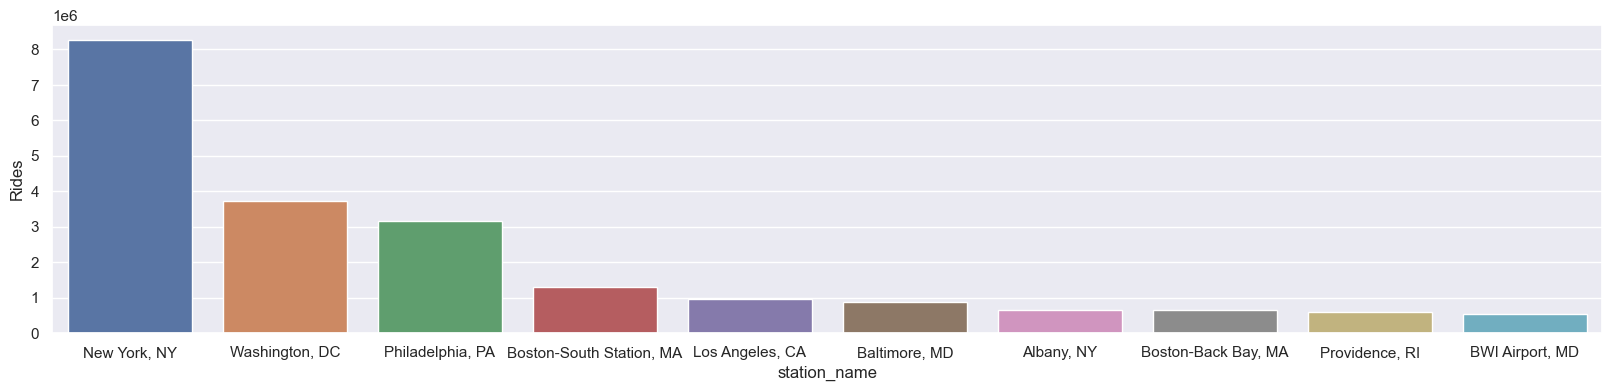

In [155]:
year_agg = pd.DataFrame(amtrak_df.groupby(['station_name','Year'])['Rides'].sum()).reset_index()
year_agg = year_agg.sort_values(by=['Year','Rides'], ascending=False)
year_agg = year_agg.groupby('Year').head(10).reset_index(drop=True)

def plot_rides_per_year(year_filter):
    df = year_agg[year_agg['Year']==year_filter]
    sns.barplot(x = 'station_name', y = 'Rides', data = df)    
    sns.set_theme(rc={'figure.figsize':(20,4)})

plot_rides_per_year(2022)

### Top 5 stations over time

<AxesSubplot: xlabel='Year', ylabel='Rides'>

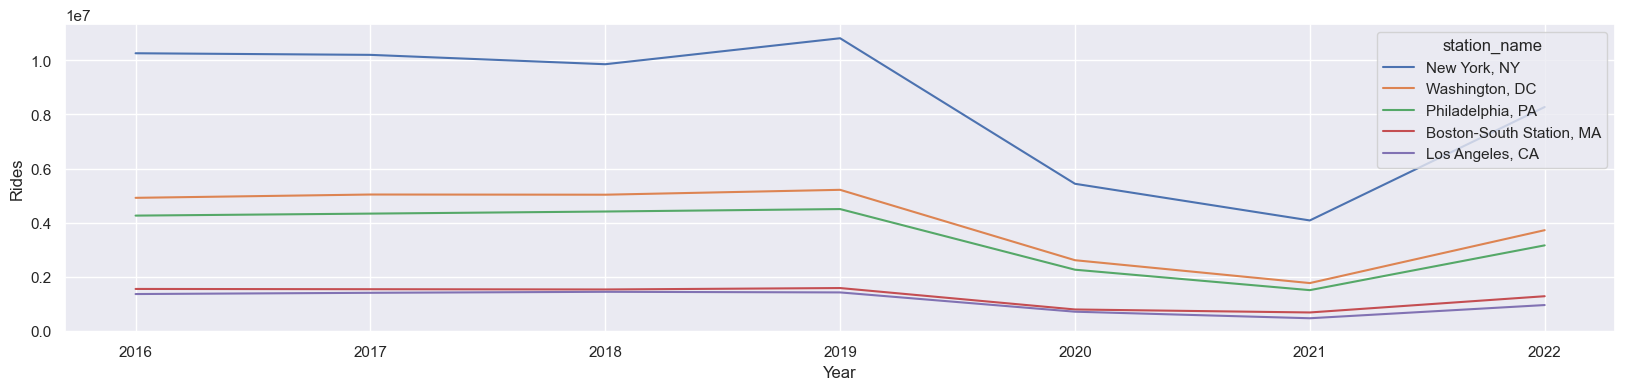

In [156]:
station_agg = pd.DataFrame(amtrak_df.groupby(['station_name'])['Rides'].sum()).reset_index()
station_agg = station_agg.sort_values(by=['Rides'], ascending=False).head(5)['station_name']
station_list = station_agg.tolist()


stn_agg = pd.DataFrame(amtrak_df.groupby(['station_name','Year'])['Rides'].sum()).reset_index()
stn_agg = stn_agg.sort_values(by=['Year','Rides'], ascending=False)
plot = stn_agg[stn_agg['station_name'].isin(station_list)]

sns.lineplot(x = 'Year', y = 'Rides', data = plot ,hue= 'station_name')

### Top 10 states per year

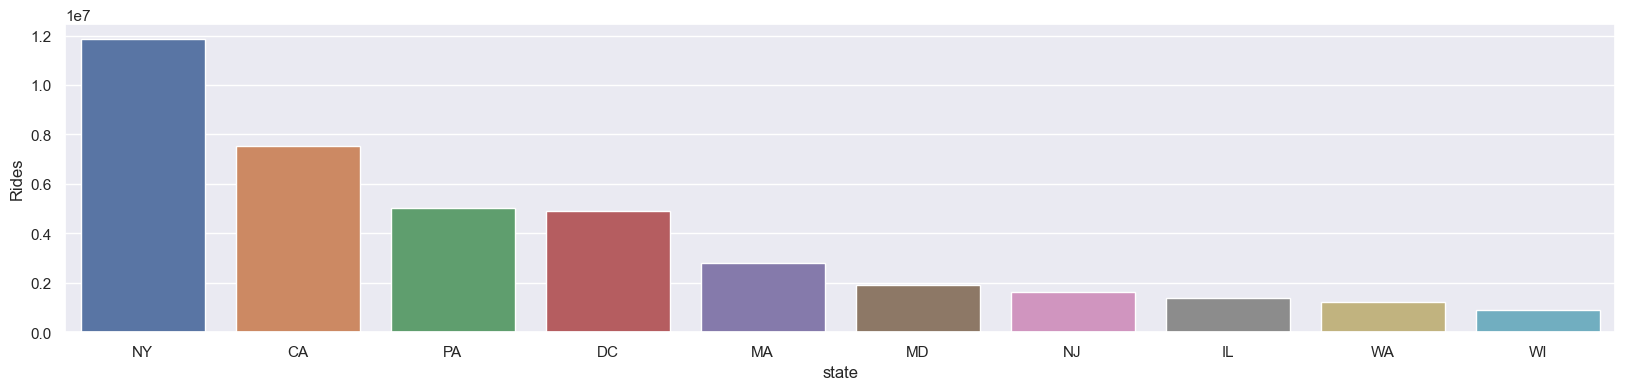

In [157]:
year_agg = pd.DataFrame(amtrak_df.groupby(['state','Year'])['Rides'].sum()).reset_index()
year_agg = year_agg.sort_values(by=['Year','Rides'], ascending=False)
year_agg = year_agg.groupby('Year').head(10).reset_index(drop=True)

def plot_rides_per_year(year_filter):
    df = year_agg[year_agg['Year']==year_filter]
    sns.barplot(x = 'state', y = 'Rides', data = df)    
    sns.set_theme(rc={'figure.figsize':(20,4)})

plot_rides_per_year(2016)

### Top 5 states over time

<AxesSubplot: xlabel='Year', ylabel='Rides'>

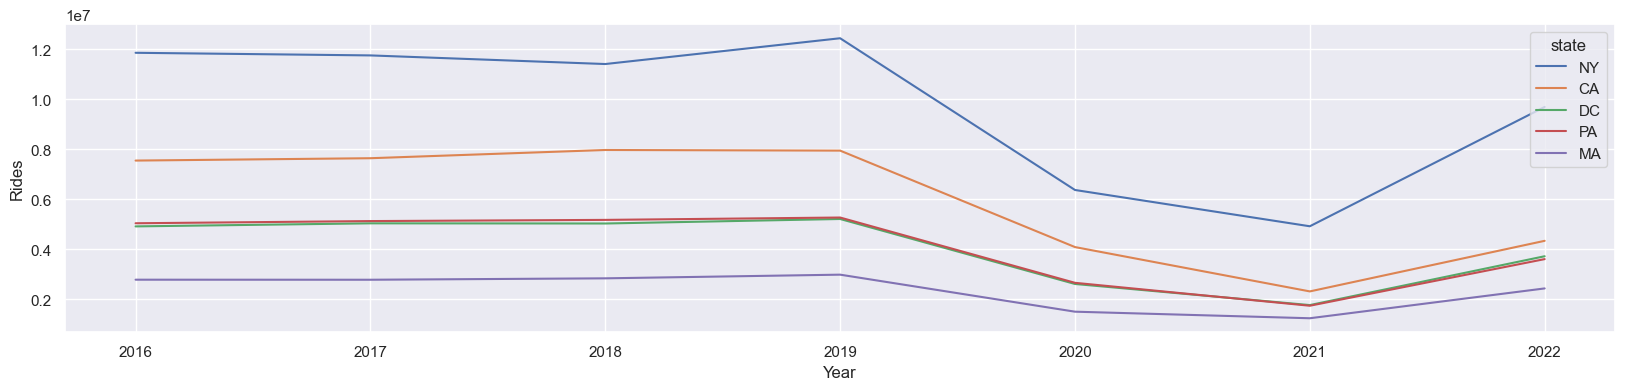

In [158]:
state_agg = pd.DataFrame(amtrak_df.groupby(['state'])['Rides'].sum()).reset_index()
state_agg = state_agg.sort_values(by=['Rides'], ascending=False).head(5)['state']
state_list = state_agg.tolist()

state_agg = pd.DataFrame(amtrak_df.groupby(['state'])['Rides'].sum()).reset_index()
state_agg = state_agg.sort_values(by=['Rides'], ascending=False).head(5)['state']
state_list = state_agg.tolist()

state_agg = pd.DataFrame(amtrak_df.groupby(['state','Year'])['Rides'].sum()).reset_index()
state_agg = state_agg.sort_values(by=['Year','Rides'], ascending=False)
plot = state_agg[state_agg['state'].isin(state_list)]

sns.lineplot(x = 'Year', y = 'Rides', data = plot ,hue= 'state')

### Plot Maps

In [159]:
map_df = pd.DataFrame(amtrak_df.groupby(['station_name','Year','lat','lon'])['Rides'].sum()).reset_index()
map_df = map_df.sort_values(by=['Year','Rides'], ascending=False)
map_df.head(3)

,station_name,Year,lat,lon,Rides
1644,"New York, NY",2022,40.750238,-73.992811,8274500.0
2519,"Washington, DC",2022,38.898370,-77.005863,3724100.0
1861,"Philadelphia, PA",2022,39.955926,-75.181998,3162900.0


In [160]:
map_df_filtered = map_df[map_df['Year']==2019]

fig = px.scatter_mapbox(
    map_df_filtered, lat="lat", lon="lon",    
    color="Rides", 
    size="Rides",
    color_continuous_scale=px.colors.cyclical.IceFire, 
    size_max=50, 
    center = {"lat": 37.0902, "lon": -95.7129},
    zoom=3,
    hover_data = {
        "lat":False,
        "lon":False,
        "station_name":True,
        "Rides":True                        
    }
)
fig.update_layout(mapbox_style="carto-positron",margin={"r":0,"t":0,"l":0,"b":0})

In [161]:
map_df

,station_name,Year,lat,lon,Rides
1644,"New York, NY",2022,40.750238,-73.992811,8274500.0
2519,"Washington, DC",2022,38.898370,-77.005863,3724100.0
1861,"Philadelphia, PA",2022,39.955926,-75.181998,3162900.0
223,"Boston-South Station, MA",2022,42.351546,-71.055153,1283700.0
1378,"Los Angeles, CA",2022,34.056058,-118.235896,957400.0
...,...,...,...,...,...
77,"Arcadia, MO",2016,37.649536,-90.671728,0.0
742,"Fairfield-Vacaville, CA",2016,38.285447,-121.967975,0.0
1421,"Marks, MS",2016,34.258176,-90.272366,0.0
2002,"Roanoke, VA",2016,37.273114,-79.943461,0.0


In [162]:
wider_df = map_df.pivot_table(index='station_name', columns='Year', values='Rides').reset_index()
wider_df.columns = ['station_name'] + ['Y' + str(col) if col != 'station_name' else col for col in wider_df.columns[1:]]

wider_df['Chg16_22'] = (wider_df['Y2022'] - wider_df['Y2016']) / wider_df['Y2016']
wider_df['Chg20_22'] = (wider_df['Y2022'] - wider_df['Y2020']) / wider_df['Y2020']
wider_df['Chg19_20'] = (wider_df['Y2020'] - wider_df['Y2019']) / wider_df['Y2019']
wider_df

,station_name,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Chg16_22,Chg20_22,Chg19_20
0,"Aberdeen, MD",37161.0,37045.0,37867.0,39108.0,19743.0,14180.0,34040.0,-0.083986,0.724155,-0.495167
1,"Albany, NY",842200.0,788100.0,790500.0,807000.0,451000.0,380800.0,661300.0,-0.214795,0.466297,-0.441140
2,"Albany, OR",33656.0,33933.0,30780.0,32856.0,19082.0,13959.0,26938.0,-0.199608,0.411697,-0.419223
3,"Albuquerque, NM",75651.0,74293.0,64382.0,67356.0,38315.0,26029.0,43186.0,-0.429142,0.127130,-0.431157
4,"Alderson, WV",449.0,449.0,433.0,578.0,198.0,271.0,324.0,-0.278396,0.636364,-0.657439
...,...,...,...,...,...,...,...,...,...,...,...
384,"Wolf Point, MT",5662.0,5097.0,4447.0,4603.0,3033.0,2435.0,3005.0,-0.469269,-0.009232,-0.341082
385,"Woodbridge, VA",9971.0,9680.0,9669.0,11741.0,7445.0,7340.0,19410.0,0.946645,1.607119,-0.365897
386,"Yazoo City, MS",3811.0,3587.0,3195.0,3167.0,2131.0,1843.0,2374.0,-0.377066,0.114031,-0.327123
387,"Yemassee, SC",10770.0,10451.0,9740.0,9428.0,5710.0,5096.0,5171.0,-0.519870,-0.094396,-0.394357


In [163]:
coords = map_df[['station_name','lat','lon']].drop_duplicates()
coords

,station_name,lat,lon
1644,"New York, NY",40.750238,-73.992811
2519,"Washington, DC",38.898370,-77.005863
1861,"Philadelphia, PA",39.955926,-75.181998
223,"Boston-South Station, MA",42.351546,-71.055153
1378,"Los Angeles, CA",34.056058,-118.235896
...,...,...,...
1987,"Rensselaer, IN",40.943173,-87.154939
34,"Alderson, WV",40.408700,-6.244720
1581,"Mount Vernon, WA",48.417792,-122.334634
167,"Bellingham, WA",48.720417,-122.511263


In [164]:
wider_df = pd.merge(wider_df, coords, on=['station_name'], how='inner')


In [171]:
fig = px.scatter_mapbox(
    wider_df, lat="lat", lon="lon",    
    color="Chg19_20", 
    #size=5,
    color_continuous_scale='agsunset', 
    size_max=50, 
    center = {"lat": 37.0902, "lon": -95.7129},
    zoom=3,
    hover_data = {
        "lat":False,
        "lon":False,
        "station_name":True,
        "Chg16_22":True                        
    }
)
fig.update_layout(mapbox_style="carto-positron",margin={"r":0,"t":0,"l":0,"b":0})